# Improting Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import scipy.stats as st 
import warnings 
warnings.filterwarnings('ignore')

# Loading The datasets 

In [2]:
df =pd.read_csv('yellow_tripdata_2020-01 (1).csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [7]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df["duration"]=df["duration"].dt.total_seconds()/60

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [9]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [10]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [11]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [12]:
# Data ke ander kitna persent null value h 
(65441/len(df))*100     # 1 % h to hmm drop kar sakte h 

1.021716132126611

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [15]:
df.shape

(6339567, 5)

In [16]:
df.head() 

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [17]:
 # passenger_count or  payment_type desimal me nhi ho sakte to hmm ese convert karegy int me 
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [18]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(3007861, 5)

In [21]:
# value count hmm Frequency  dega per es me normalize true kar de to percentage of a contribution dega
df['passenger_count'].value_counts(normalize=True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [22]:
df['payment_type'].value_counts(normalize=True)


1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [23]:
#selection line
df = df[df['payment_type'] < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [24]:
df.shape

(2780283, 5)

In [25]:
# payment type replace value 
df['payment_type'].replace([1,2],["card","cash"],inplace=True)


In [26]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.2,4.800000
1,1,card,7.0,1.2,7.416667
2,1,card,6.0,0.6,6.183333
3,1,card,5.5,0.8,4.850000
4,1,cash,3.5,0.0,2.300000


In [27]:
# numeric value   # 75% or max dekne per outlier peta chlta h
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [28]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c542395210>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5591027d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c52e93cfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c57c320a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c57c3213d0>],
 'means': []}

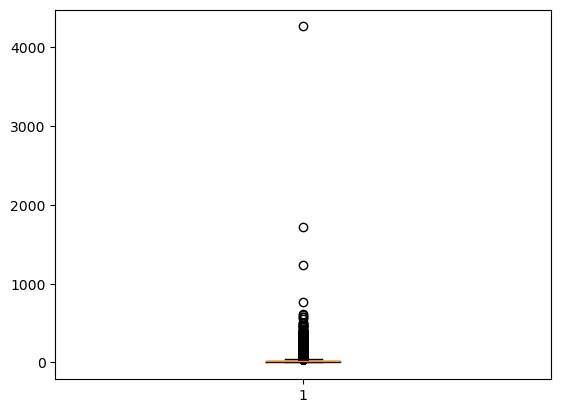

In [29]:
plt.boxplot(df['fare_amount'])


In [30]:
# remove outlier in the data set 
for col in ['fare_amount','trip_distance','duration']:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fance=Q1-(1.5*IQR)
    upper_fance=Q3+(1.5*IQR)
    df=df[(df[col]>=lower_fance) & (df[col]<=upper_fance)]

In [31]:
df['payment_type'].unique()
dff=df

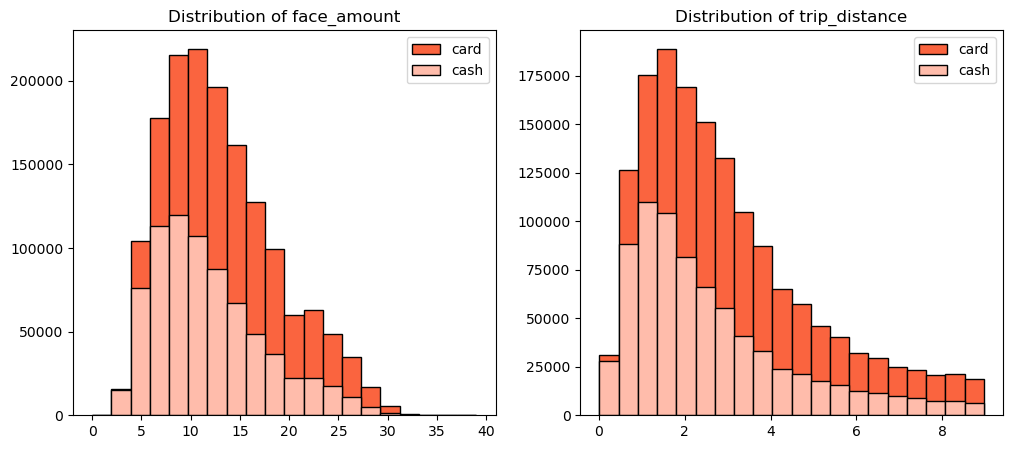

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of face_amount")
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label="card")
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label="cash")
plt.legend()



plt.subplot(1,2,2)
plt.title("Distribution of trip_distance")
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label="card")
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label="cash")
plt.legend()
plt.show()





In [33]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

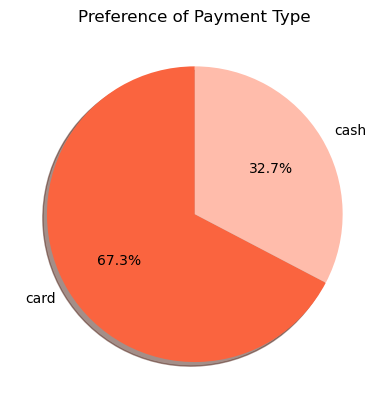

In [34]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
        startangle= 90, shadow= True, autopct= '%1.1f%%', colors=['#FA643F','#FFBCAB'])
plt.show()

In [35]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [36]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [37]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [38]:
# ak hm custom data frame create karegy es me ye passage count value dale gy  and Transform data frame 

In [39]:
df=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df['payment_type']=['Card','Cash']
df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df.iloc[1,1:]=passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


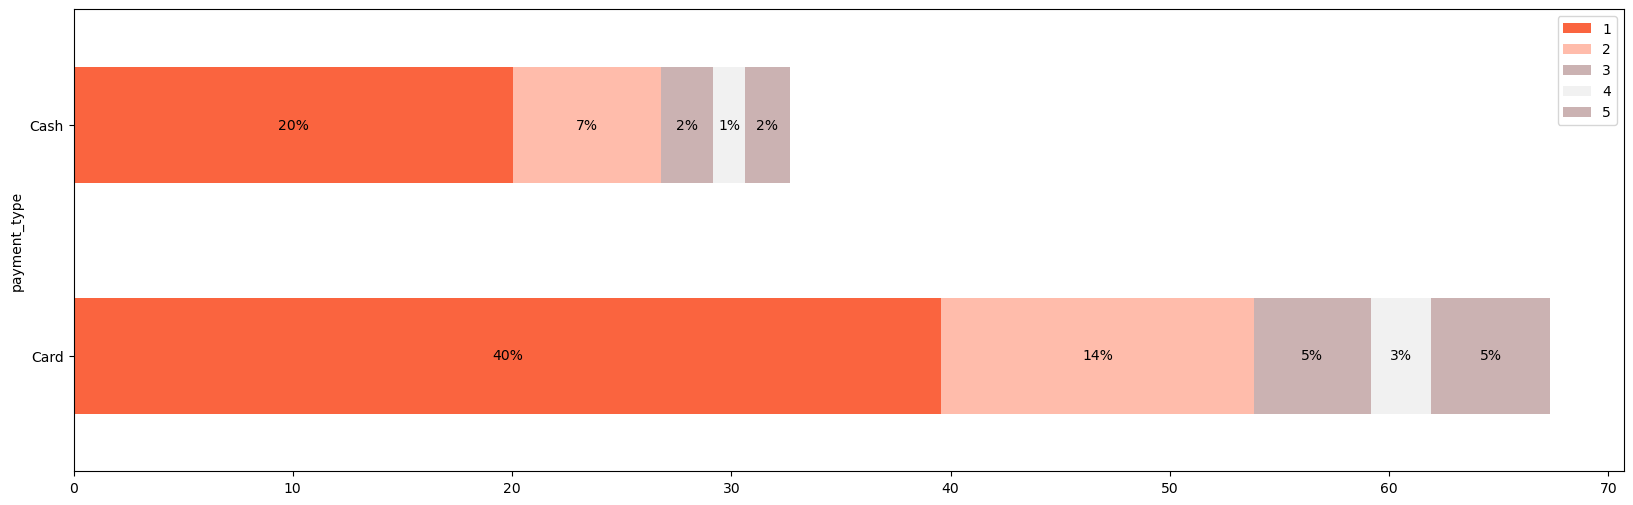

In [40]:
# ax=plt.subplot(figsize=(20,6))
# df.plot(x='payment_type',kind='barh',stacked=True,ax=ax, color=["#FA643F","#FFBCAB","CBB2B2","#F1F1F1","#CBB2B2"])
# # add pescentage 
# for q in ax.patches:
#     width=p.get_width()
#     height=p.get_height()
#     x,y=p.get_xy()
#     ax.text(x+width/2,y+height/2,'{:.0f}%',format(width),
#     horizontalaligment='center',
#     varticalignment='center')


fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, ax=ax, 
        color=["#FA643F", "#FFBCAB", "#CBB2B2", "#F1F1F1", "#CBB2B2"])

# Add percentage labels
for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x, y = patch.get_xy()
    
    if width > 0:
        ax.text(x + width / 2, y + height / 2, f'{width:.0f}%',
                ha='center', va='center')

plt.show()



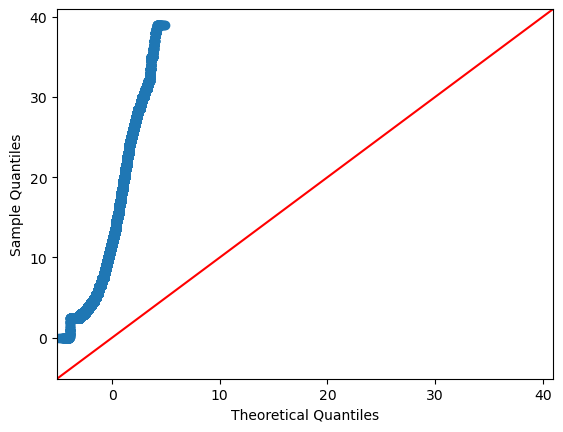

In [41]:
sm.qqplot(dff['fare_amount'],line='45')
plt.show()

In [42]:
card_sample=dff[dff['payment_type']=='card']['fare_amount']
cash_sample=dff[dff['payment_type']=='cash']['fare_amount']



In [43]:
t_stats,p_stats=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T Staticstic',t_stats, 'P_value', p_stats)

T Staticstic 169.2111527245052 P_value 0.0
